In [ ]:
import unicodedata
import re
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sentences =" The ancient castle stood tall against the backdrop of mist-covered mountains, its weathered stone walls bearing witness to centuries of history. Inside, torches flickered dimly, casting dancing shadows along the corridors lined with tapestries depicting epic battles and noble quests. Scholars huddled in corners, poring over ancient manuscripts filled with arcane knowledge. The aroma of hearty stew drifted from the castle kitchen, where cooks bustled about preparing meals fit for kings and knights. Outside, in the castle courtyard, knights practiced their swordsmanship under the watchful eye of seasoned masters. It was a place where legends were born and whispered secrets echoed through the halls."

In [ ]:
def unicodeToAscii(s):
  return "".join(c for c in unicodedata.normalize('NFD',s) if unicodedata.category(c)!='Mn')
def normalizeString(s):
  s=unicodeToAscii(s.lower().strip())
  s=re.sub(r"([.!?])",r" \1",s)
  s=re.sub(r"[^a-zA-Z!?]+",r" ",s)
  return s.strip()

In [ ]:
sentences=normalizeString(sentences)
sentences

'the ancient castle stood tall against the backdrop of mist covered mountains its weathered stone walls bearing witness to centuries of history inside torches flickered dimly casting dancing shadows along the corridors lined with tapestries depicting epic battles and noble quests scholars huddled in corners poring over ancient manuscripts filled with arcane knowledge the aroma of hearty stew drifted from the castle kitchen where cooks bustled about preparing meals fit for kings and knights outside in the castle courtyard knights practiced their swordsmanship under the watchful eye of seasoned masters it was a place where legends were born and whispered secrets echoed through the halls'

In [ ]:
vocab=sorted(list(set(sentences.split())))
vocab

In [ ]:
index2word={i:j for i,j in enumerate(vocab)}
index2word

In [ ]:
word2index={j:i  for i,j in enumerate(vocab) }
word2index

In [ ]:
vocab_len=len(vocab)
context_size=2

In [ ]:
vocab_len

86

In [ ]:
data=[]
target=[]
for i in range(2,len(sentences.split())-2):
  context=[word2index[sentences.split()[i-2]],word2index[sentences.split()[i-1]],word2index[sentences.split()[i+1]],word2index[sentences.split()[i+2]]]
  center=[word2index[sentences.split()[i]]]
  a=torch.nn.functional.one_hot(torch.tensor(context), num_classes=vocab_len)
  b=torch.nn.functional.one_hot(torch.tensor(center), num_classes=vocab_len)
  target.append(center)
  data.append(a)
target=torch.tensor(target)
target=target.squeeze()
data = np.array(data)
input = torch.from_numpy(data)
input, target

In [ ]:
class cbow(nn.Module):
  def __init__ (self,input_size,n):
    super(cbow,self).__init__()
    self.n=n
    self.linearv=nn.Linear(input_size,n)
    self.linearz=nn.Linear(n,input_size)
  def forward(self,input):
    input=input.float()
    layer_1=self.linearv(input)
    ave=torch.sum(layer_1,dim=1)/2*context_size
    layer2=self.linearz(ave)
    y_pred=torch.softmax(layer2,dim=1)
    return y_pred

In [ ]:

model = cbow(vocab_len,90)
optimizer = optim.Adam(model.parameters(), lr=0.1)  #
model.train()
epoch=10000
for i in range(epoch):

    y= model(input)


    loss = criterion(y, target)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    print(f'Epoch {epoch-(1+i)}, Loss: {loss.item()}')



In [ ]:
y[0].argmax(),target[0]

(tensor(14), tensor(14))

In [ ]:
for i in range(44):

    print(target[i]==y[i].argmax())


tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(False)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)


In [ ]:
torch.save(model.state_dict(), "model_save_path")

In [ ]:
model.load_state_dict(torch.load("/content/model_save_path"))

<All keys matched successfully>

In [ ]:
word_embeddings = model.linearv.weight.data
word_embeddings.shape

torch.Size([90, 86])

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming word_embeddings is a PyTorch tensor
word_embeddings = word_embeddings.cpu().numpy()  # Convert to numpy array if necessary

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
word_embeddings_2d = tsne.fit_transform(word_embeddings)


In [ ]:
from sklearn.manifold import TSNE

# Assuming word_embeddings is a numpy array of shape (num_samples, embedding_dim)
n_samples = word_embeddings.shape[0]
perplexity = min(n_samples - 1, 50)  # Adjust perplexity as needed

tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
word_embeddings_2d = tsne.fit_transform(word_embeddings)


In [ ]:
a=[index2word[i] for i in range(44)]
a

['a',
 'about',
 'against',
 'along',
 'ancient',
 'and',
 'arcane',
 'aroma',
 'backdrop',
 'battles',
 'bearing',
 'born',
 'bustled',
 'casting',
 'castle',
 'centuries',
 'cooks',
 'corners',
 'corridors',
 'courtyard',
 'covered',
 'dancing',
 'depicting',
 'dimly',
 'drifted',
 'echoed',
 'epic',
 'eye',
 'filled',
 'fit',
 'flickered',
 'for',
 'from',
 'halls',
 'hearty',
 'history',
 'huddled',
 'in',
 'inside',
 'it',
 'its',
 'kings',
 'kitchen',
 'knights']

In [ ]:
from sklearn.decomposition import PCA

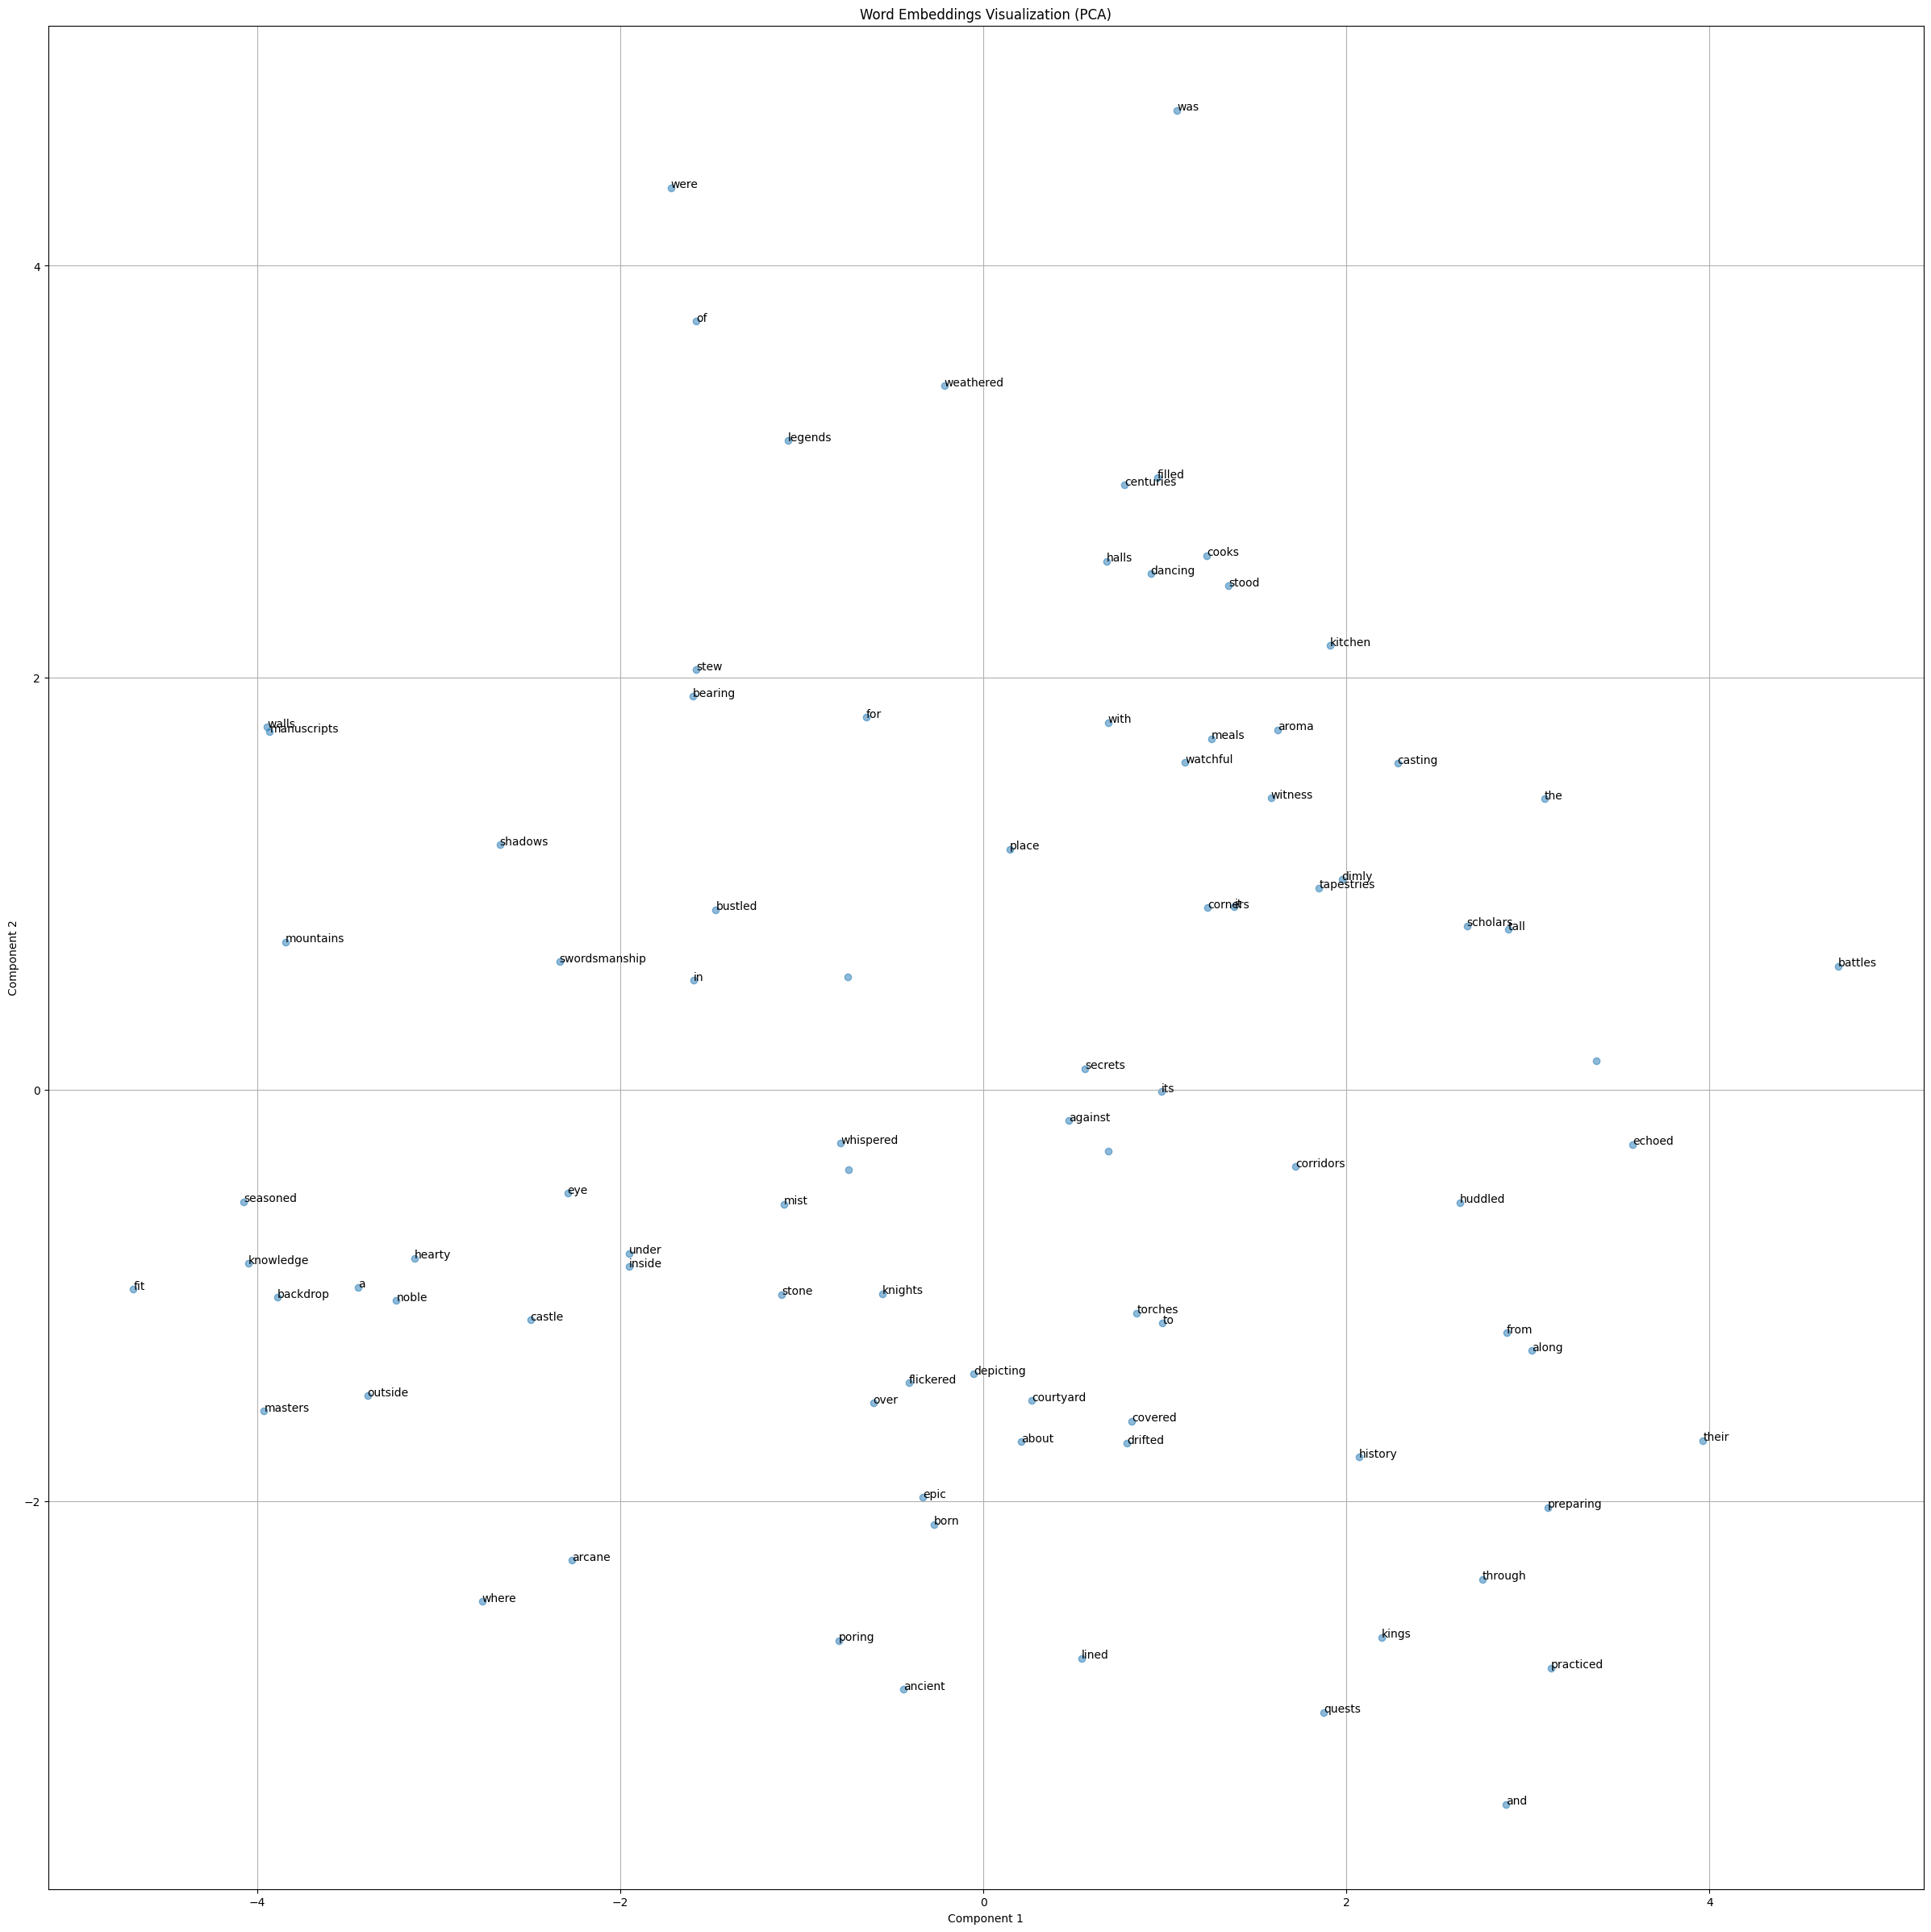

In [ ]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(word_embeddings)

# Plot the embeddings
plt.figure(figsize=(30, 30))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)

# Annotate points with words (optional)
# Example: Replace with your actual words or labels
words = [ index2word[i] for i in range(vocab_len)]
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

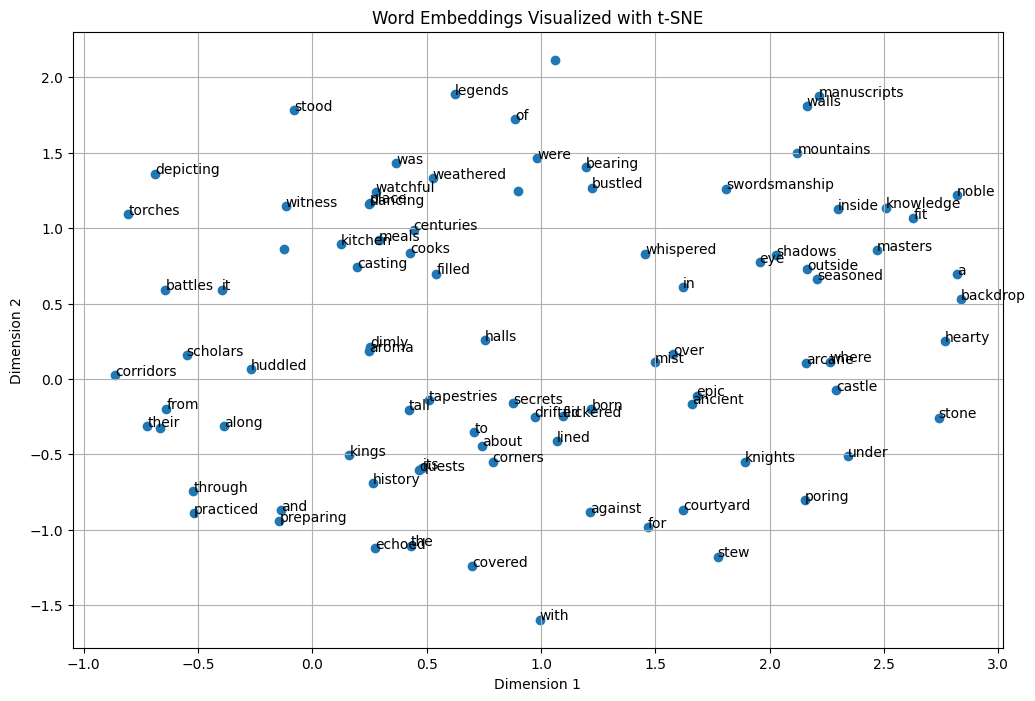

In [ ]:
# Example word list for labeling the embeddings
words =  [index2word[i] for i in range(vocab_len)]

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], marker='o')

# Annotate points
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('Word Embeddings Visualized with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
